In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv('height-weight.csv')

In [4]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

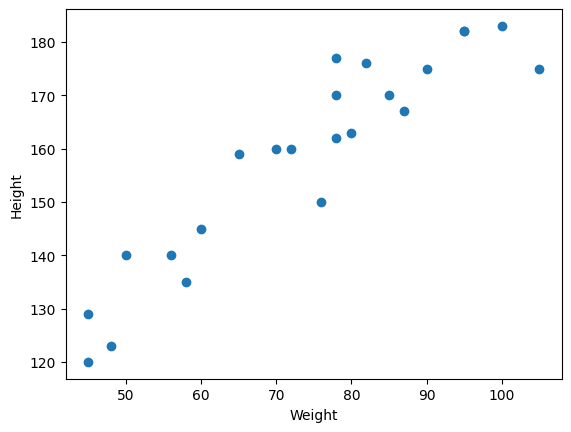

In [5]:
## Scatter plot
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")

In [6]:
## Correlation
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


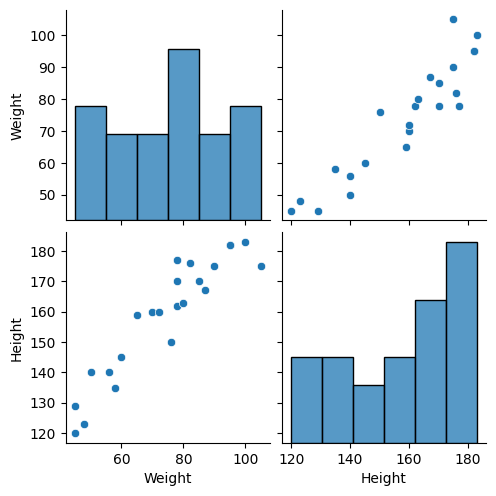

In [7]:
import seaborn as sns
sns.pairplot(df)

In [16]:
# Independent and Dependent features
X = df[['Weight']] ## independent features should be in dataframe and in 2-dimensional
Y = df['Height'] # dependent can be in series and in 1d array


In [17]:
X_series = df['Weight']
np.array(X_series).shape

(23,)

In [19]:
np.array(Y).shape

(23,)

In [22]:
## Train and Test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

In [26]:
X_train.shape


(17, 1)

In [35]:
## Standardization mean=0,standrd devaition=1
from sklearn.preprocessing import StandardScaler

In [36]:
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)

In [37]:
X_test = scaler.transform(X_test)

In [38]:
## Apply Linear Regression
from sklearn.linear_model import LinearRegression

In [41]:
regression = LinearRegression(n_jobs=-1)

In [42]:
regression.fit(X_train,Y_train)

LinearRegression(n_jobs=-1)

In [45]:
print("Slope:",regression.coef_)  ## This is the Beta1 value

Slope: [17.2982057]


In [47]:
print("Intercept:",regression.intercept_) # it tells it on what point our best fit line crosses on y axis and beta0 value

Intercept: 156.47058823529412


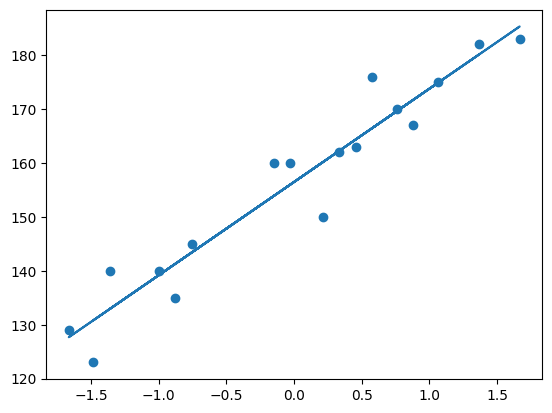

In [49]:
## Plot trainning data plot best fit liine
plt.scatter(X_train,Y_train)
plt.plot(X_train, regression.predict(X_train))

In [51]:
## Prediction for test data
## Y_pred_test = intercept+coef(weights)
##             = 156.470+17.29(X_test)
Y_pred=regression.predict(X_test)

In [52]:
## Performance Metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [53]:
mse = mean_squared_error(Y_test,Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
print("MSE:",mse)
print("MAE:",mae)
print("RMSE:",rmse)


MSE: 114.84069295228699
MAE: 9.66512588679501
RMSE: 10.716374991212605


In [54]:
## Finding R^2
from sklearn.metrics import r2_score

In [56]:
score =r2_score(Y_test,Y_pred)
print(score)

0.7360826717981276


In [57]:
# display adjusted R-squared
1 - (1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.6701033397476595

In [58]:
##OLS Linear Regression
import statsmodels.api as sm

In [60]:
model = sm.OLS(Y_train,X_train).fit()

In [61]:
model.predict(X_test)

array([  5.79440897,   5.79440897, -28.78711691,  23.60913442,
        -7.82861638,  34.08838469])

In [62]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Tue, 23 Sep 2025   Prob (F-statistic):                       0.664
Time:                        18:22:19   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [68]:
# Prediction For new Data
regression.predict(scaler.transform([[72]]))

array([1401.94139895])